In [1]:
#Matplotlib magic command
%matplotlib inline
#Dependencies and Startup
import matplotlib.pyplot as plt 
import pandas as pd

In [2]:
#files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
#read the city data file and store it in the pandas DF
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# Now read the ride data file using the same method
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
# Getting the unique values for each type of city
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [6]:
# Getting the number of data points by type. URBAN
sum(city_data_df["type"]=="Urban")

66

In [7]:
# NOW getting the sum of the number of data points for SUBURBAN
sum(city_data_df["type"]=="Suburban")

36

In [8]:
# Now getting the sum of the types for Rural
sum(city_data_df["type"]=="Rural")

18

In [9]:
# Combine the data into one single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city","city"])

# Display the merged dataframe
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [10]:
#* PLEASE BE AWARE**# 
# CHALLENGE 5 CODING BEGINS HERE*

In [11]:
#CHALLENGE: making the Summary DataFrame
#Get total rides by type
total_rides_by_type= pyber_data_df.groupby(['type']).count()['ride_id']
total_rides_by_type.head()

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [12]:
#CHALLENGE: making the Summary DataFrame
#Get total drivers by type
total_drivers_by_type = city_data_df.groupby(['type']).sum()['driver_count']
total_drivers_by_type.head()

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [13]:
#CHALLENGE: making the Summary DataFrame
#Get the total fares by type
total_fares_by_type = pyber_data_df.groupby(['type']).sum()['fare']
total_fares_by_type.head()

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [14]:
#CHALLENGE: making the Summary DataFrame
# Calculating Average fares per ride
avg_fare_per_ride = total_fares_by_type/total_rides_by_type
avg_fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [15]:
#CHALLENGE: making the Summary DataFrame
# Calculating Average fares per driver
avg_fare_per_driver = total_fares_by_type / total_drivers_by_type
avg_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [16]:
#CHALLENGE: making the Summary DataFrame
#Creating the new dataframe:
ride_summary_df = pd.DataFrame({"Total Rides": total_rides_by_type, "Total Drivers": total_drivers_by_type, "Total Fares": total_fares_by_type, "Average Fare per Ride": avg_fare_per_ride, "Average Fare per Driver": avg_fare_per_driver})

ride_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [17]:
#CHALLENGE: making the Summary DataFrame
#APPLYING FORMATTING TO THE SUMMARY DATAFRAME

ride_summary_df["Total Fares"] = ride_summary_df["Total Fares"].map("${:,.2f}".format)
ride_summary_df["Average Fare per Ride"] = ride_summary_df["Average Fare per Ride"] .map("${:.2f}".format)
ride_summary_df["Average Fare per Driver"] = ride_summary_df["Average Fare per Driver"] .map("${:.2f}".format)

In [18]:
#CHALLENGE: making the Summary DataFrame
#APPLYING FORMATTING TO THE SUMMARY DATAFRAME
ride_summary_df.index.name = None

In [19]:
#**** ATTENTION ***
# CHALLENGE MODULE 5
# BELOW IS DELIVERABLE NUMBER 1: Summary DataFrame

ride_summary_df


,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


In [20]:
import tabulate

In [21]:
print(ride_summary_df.to_markdown())

|          |   Total Rides |   Total Drivers | Total Fares   | Average Fare per Ride   | Average Fare per Driver   |
|:---------|--------------:|----------------:|:--------------|:------------------------|:--------------------------|
| Rural    |           125 |              78 | $4,327.93     | $34.62                  | $55.49                    |
| Suburban |           625 |             490 | $19,356.33    | $30.97                  | $39.50                    |
| Urban    |          1625 |            2405 | $39,854.38    | $24.53                  | $16.57                    |


In [22]:
# CHALLENGE DELIVERABLE 2:
# Renaming the columns of the pyber dataframe

pyber_data_df = pyber_data_df.rename(columns={'city':'City', 'date':'Date','fare':'Fare', 'ride_id': 'Ride Id','driver_count': 'No. Drivers', 'type':'City Type'})

In [23]:
# CHALLENGE DELIVERABLE 2:
# Setting the index of the Pyber Dataframe to be the date column

pyber_data_df = pyber_data_df.set_index('Date')

In [24]:
# CHALLENGE DELIVERABLE 2:
# Creating a New dataframe sorta
new_pyber_fares_df = pyber_data_df[['City Type', 'Fare']].copy()
new_pyber_fares_df

,City Type,Fare
Date,,
2019-01-14 10:14:22,Urban,13.83
2019-03-04 18:24:09,Urban,30.24
2019-02-24 04:29:00,Urban,33.44
2019-02-10 23:22:03,Urban,23.44
2019-03-06 04:28:35,Urban,34.58
...,...,...
2019-04-29 17:04:39,Rural,13.38
2019-01-30 00:05:47,Rural,20.76
2019-02-10 21:03:50,Rural,11.11


In [25]:
#CHALLENGE DELIVERABLE 2:
# Checking the index datatype
new_pyber_fares_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2375 entries, 2019-01-14 10:14:22 to 2019-04-25 10:20:13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City Type  2375 non-null   object 
 1   Fare       2375 non-null   float64
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [26]:
#CHALLENGE DELIVERABLE 2:
# Changing the index to be the datetime datatype
new_pyber_fares_df.index = pd.to_datetime(new_pyber_fares_df.index)
new_pyber_fares_df.index

DatetimeIndex(['2019-01-14 10:14:22', '2019-03-04 18:24:09',
               '2019-02-24 04:29:00', '2019-02-10 23:22:03',
               '2019-03-06 04:28:35', '2019-03-11 12:26:48',
               '2019-02-27 11:17:56', '2019-04-26 00:43:24',
               '2019-01-08 03:28:48', '2019-03-09 06:26:29',
               ...
               '2019-04-19 04:32:47', '2019-03-18 10:38:05',
               '2019-01-27 18:43:05', '2019-04-29 01:58:44',
               '2019-01-30 10:55:23', '2019-04-29 17:04:39',
               '2019-01-30 00:05:47', '2019-02-10 21:03:50',
               '2019-05-07 19:22:15', '2019-04-25 10:20:13'],
              dtype='datetime64[ns]', name='Date', length=2375, freq=None)

In [27]:
#CHALLENGE DELIVERABLE 2:
# Calculating the sum of fares by the type of city and date
new_pyber_fares_df.groupby(['Date','City Type']).sum()['Fare']

Date                 City Type
2019-01-01 00:08:16  Urban        37.91
2019-01-01 00:46:46  Suburban     47.74
2019-01-01 02:07:24  Suburban     24.07
2019-01-01 03:46:50  Urban         7.57
2019-01-01 05:23:21  Urban        10.75
                                  ...  
2019-05-08 04:20:00  Urban        21.99
2019-05-08 04:39:49  Urban        18.45
2019-05-08 07:29:01  Urban        18.55
2019-05-08 11:38:35  Urban        19.77
2019-05-08 13:10:18  Urban        18.04
Name: Fare, Length: 2375, dtype: float64

In [28]:
#CHALLENGE DELIVERABLE 2:
# creating the new dataframe for the fares per date and city

Fares_per_date_and_city_df = new_pyber_fares_df.groupby(['Date','City Type']).sum()['Fare'].to_frame(name = None)
Fares_per_date_and_city_df

,,Fare
Date,City Type,
2019-01-01 00:08:16,Urban,37.91
2019-01-01 00:46:46,Suburban,47.74
2019-01-01 02:07:24,Suburban,24.07
2019-01-01 03:46:50,Urban,7.57
2019-01-01 05:23:21,Urban,10.75
...,...,...
2019-05-08 04:20:00,Urban,21.99
2019-05-08 04:39:49,Urban,18.45
2019-05-08 07:29:01,Urban,18.55


In [29]:
#CHALLENGE DELIVERABLE 2:
# resetting the index of the newest dataframe
Fares_per_date_and_city_df.reset_index(inplace=True)

In [30]:
#CHALLENGE DELIVERABLE 2:
# Checking to see if the index was removed
Fares_per_date_and_city_df

,Date,City Type,Fare
0,2019-01-01 00:08:16,Urban,37.91
1,2019-01-01 00:46:46,Suburban,47.74
2,2019-01-01 02:07:24,Suburban,24.07
3,2019-01-01 03:46:50,Urban,7.57
4,2019-01-01 05:23:21,Urban,10.75
...,...,...,...
2370,2019-05-08 04:20:00,Urban,21.99
2371,2019-05-08 04:39:49,Urban,18.45
2372,2019-05-08 07:29:01,Urban,18.55
2373,2019-05-08 11:38:35,Urban,19.77


In [31]:
#CHALLENGE DELIVERABLE 2:
# Creating the pivot table dataframe
Fares_per_date_and_city_df.pivot(index = 'Date', columns = 'City Type', values = 'Fare')
Fares_per_date_and_city_df_pivot = Fares_per_date_and_city_df.pivot(index = 'Date', columns = 'City Type', values = 'Fare')

In [32]:
Fares_per_date_and_city_df_pivot

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [33]:
#CHALLENGE DELIVERABLE 2:
# Creating a new dataframe using the .loc method

Fares_by_city_date_df = Fares_per_date_and_city_df_pivot.loc['2019-01-01':'2019-04-28']
Fares_by_city_date_df


City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [34]:
#CHALLENGE DELIVERABLE 2:
# Creating a resampled Pivot Dataframe

fares_by_type_week_df = Fares_by_city_date_df.resample('W').sum()
fares_by_type_week_df

City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


In [35]:
#CHALLENGE DELIVERABLE 2
#Making sure the deficiencies are imported correctly
import matplotlib.pyplot as plt
import numpy as np 

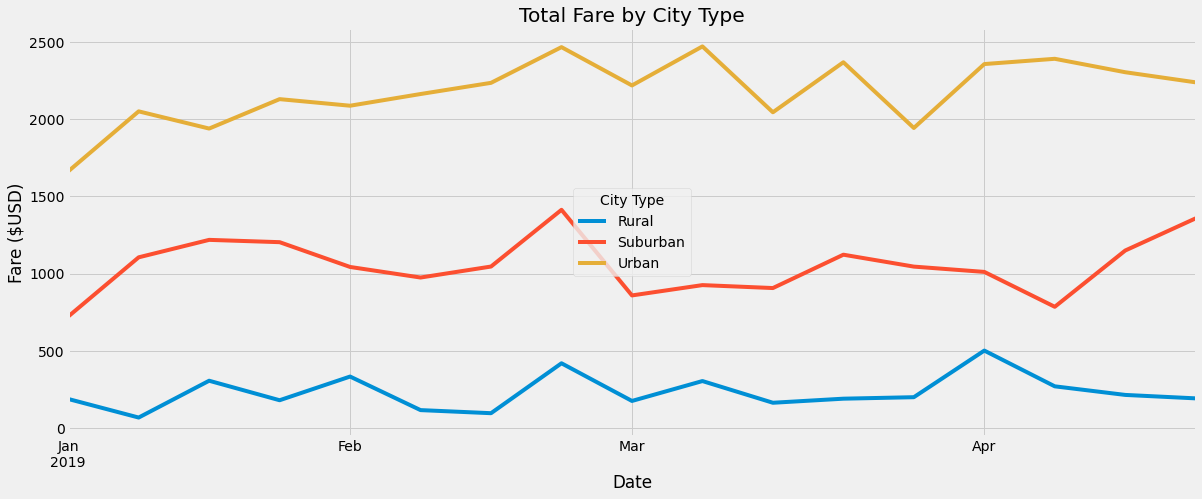

In [36]:
#CHALLENGE DELIVERABLE 2:
#Plotting the multi-line chart

plt.style.use('fivethirtyeight')
ax = fares_by_type_week_df.plot(figsize=(18,7))
ax.set_title("Total Fare by City Type")
ax.set_ylabel("Fare ($USD)")
plt.savefig("Analysis/Deliverable2.png")